# 0. Import Library

In [ ]:
# If you don't have this library, please...

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Get the Data
#### The data came from https://www.kaggle.com/anthonypino/melbourne-housing-market

### 1.01 Read the data from csv file

In [4]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# 2. Data Exploration
**Some Key Details**

`Suburb`: Suburb

`Address`: Address

`Rooms`: Number of rooms

`Price`: Price in Australian dollars

`Method`:
* S - property sold;
* SP - property sold prior;
* PI - property passed in;
* PN - sold prior not disclosed;
* SN - sold not disclosed;
* NB - no bid;
* VB - vendor bid;
* W - withdrawn prior to auction;
* SA - sold after auction;
* SS - sold after auction price not disclosed.

`Type`:
* h - house
* u - unit apartment
* t - townhouse

`SellerG`: Real Estate Agent

`Date`: Date sold

`Distance`: Distance from CBD (Central Business District) in Kilometres

`Regionname`: General Region (West, North West, North, North east …etc)

`Propertycount`: Number of properties that exist in the suburb.

`Bedroom2` : Number of Bedrooms

`Bathroom`: Number of Bathrooms

`Car`: Number of carspots

`Landsize`: Land Size in Metres

`BuildingArea`: Building Size in Metres

`YearBuilt`: Year the house was built

`CouncilArea`: Governing council for the area

`Lattitude`: Lattitude

`Longtitude`: Longtitude

**Town House**

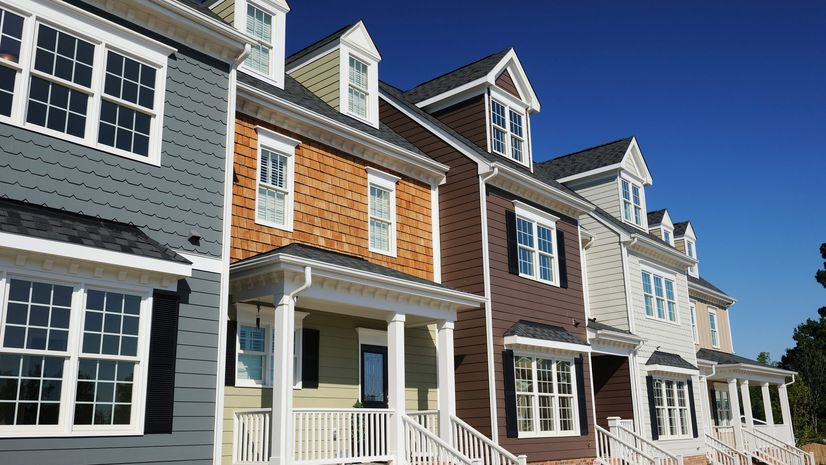

## 2.0 Skim Our Data
**Briefly overview about our data look like**

### 2.01 Preview first 5 data

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 2.02 Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### 2.03 Missing Data

In [7]:
df.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### 2.04 Data Summary

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


### 2.05 Data Correlation

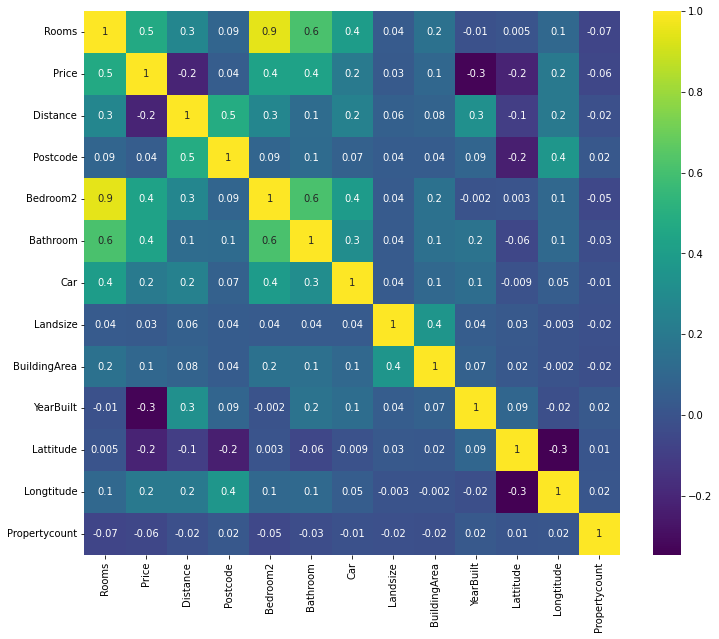

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.0g');

## 2.1 Suburb

### 2.11 Value Counts

In [10]:
df.Suburb.value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: Suburb, Length: 351, dtype: int64

#### Mean

In [11]:
df.Suburb.value_counts().mean() # Rata-rata rumah yang dijual tiap pinggiran kota adalah 99 rumah

99.3076923076923

#### Percentile

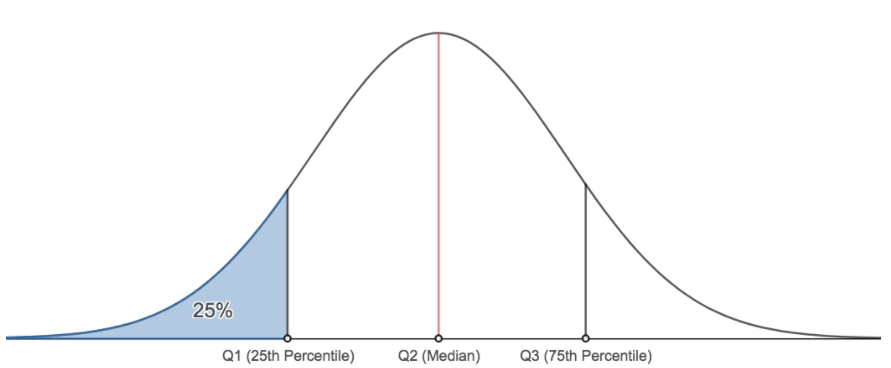

In [12]:
np.percentile(df.Suburb.value_counts(), q=25) # Kuartil 1 = 16 rumah

16.0

In [13]:
np.percentile(df.Suburb.value_counts(), q=50) # Kuartil 2 (median) =  55 rumah

55.0

In [14]:
np.percentile(df.Suburb.value_counts(), q=75) # Kuartil 3 = 135 rumah

135.5

### 2.12 Correlation with Price

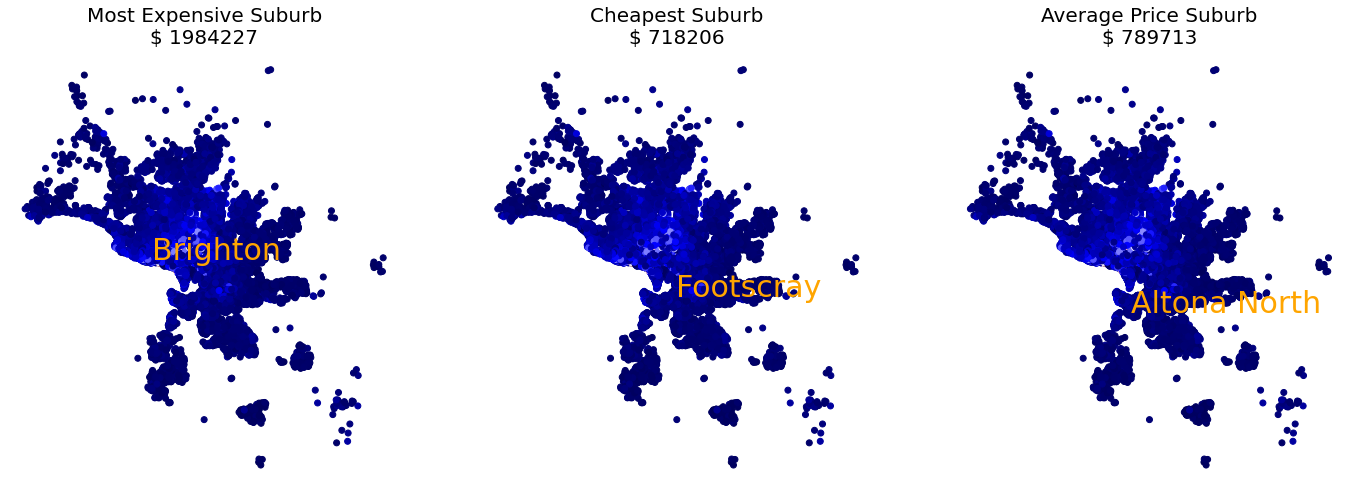

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

ax1.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].max()]).to_list()[0]
ax1.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax1.set_title(f"""Most Expensive Suburb
$ {df.Price[df['Suburb'] == 'Brighton'].mean():.0f}""", fontsize=20)
ax1.axis('off');

ax2.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].min()]).to_list()[0]
ax2.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax2.set_title(f"""Cheapest Suburb
$ {df.Price[df['Suburb'] == 'Footscray'].mean():.0f}""", fontsize=20)
ax2.axis('off');

ax3.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='seismic');
place = (df.Suburb[df['Price'] == df['Price'].median()]).to_list()[0]
ax3.text(df.Lattitude[df['Suburb'] == place].mean(), df.Longtitude[df['Suburb'] == place].mean(), f'{place}', fontsize=30, c='orange')
ax3.set_title(f"""Average Price Suburb
$ {df.Price[df['Suburb'] == 'Altona North'].mean():.0f}""", fontsize=20)
ax3.axis('off');

### 2.13 Plot Distribution

#### Horizontal Bar

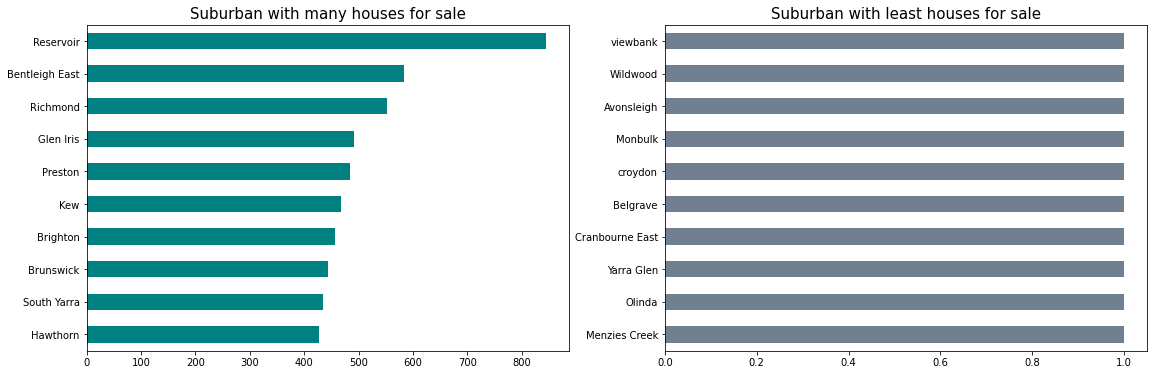

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Suburb.value_counts()[:10][::-1].plot(kind='barh', color='teal', ax=ax1)
ax1.set_title('Suburban with many houses for sale',  fontsize=15);

df.Suburb.value_counts()[-10:][::-1].plot(kind='barh', color='slategray', ax=ax2)
ax2.set_title('Suburban with least houses for sale', fontsize=15);

#### Histogram

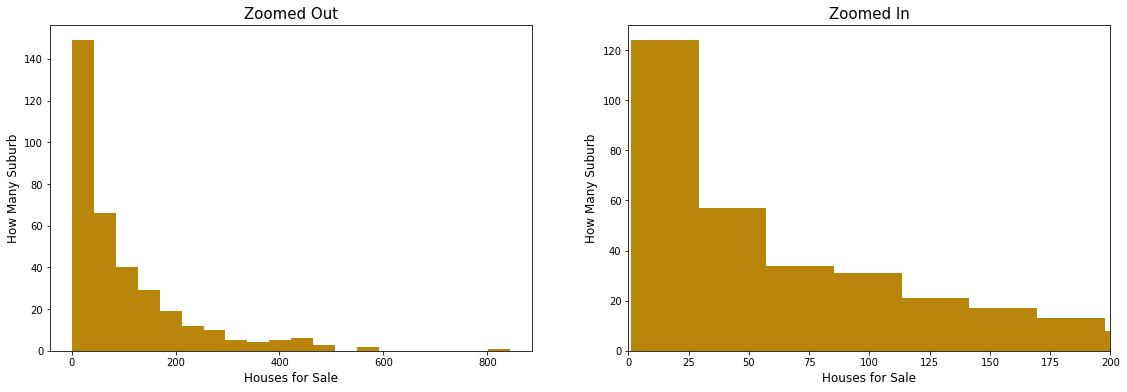

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Suburb.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod', ax=ax1);
ax1.set_title('Zoomed Out', fontsize=15)
ax1.set_xlabel('Houses for Sale', fontsize=12);
ax1.set_ylabel('How Many Suburb', fontsize=12);

df.Suburb.value_counts().plot(kind='hist', bins=30, color='darkgoldenrod', ax=ax2)
ax2.set_xlim(0, 200)
ax2.set_title('Zoomed In', fontsize=15)
ax2.set_xlabel('Houses for Sale', fontsize=12)
ax2.set_ylabel('How Many Suburb', fontsize=12);

## 2.2 Address

### 2.21 Value Counts

In [18]:
df.Address.value_counts()

5 Charles St        6
25 William St       4
57 Bay Rd           3
5 Margaret St       3
16 Smith St         3
                   ..
17 Fraser St        1
11a Bewdley St      1
6/13 Ulupna Rd      1
428 North Rd        1
3 Tarrengower St    1
Name: Address, Length: 34009, dtype: int64

#### Mean

In [19]:
df.Address.value_counts().mean() # Rata-rata terjual 1 rumah setiap alamat

1.0249345761416095

#### Percentile

In [20]:
np.percentile(df.Address.value_counts(), q=25) # Kuartil 1 =  1 rumah

1.0

In [21]:
np.percentile(df.Address.value_counts(), q=50) # Kuartil 2 (median) =  1 rumah

1.0

In [22]:
np.percentile(df.Address.value_counts(), q=75) # Kuartil 3 = 1 rumah

1.0

### 2.22 Plot Distribution

#### Horizontal Plot Bar

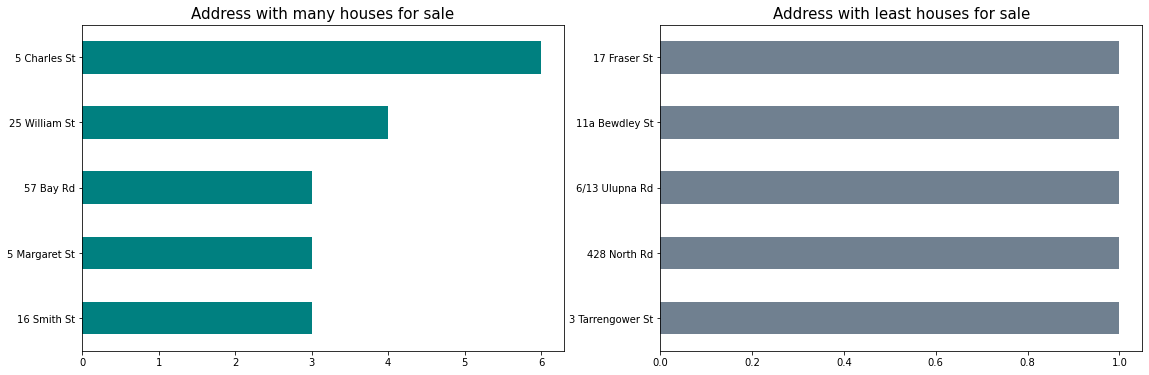

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df.Address.value_counts()[:5][::-1].plot(kind='barh', color='teal', ax=ax1)
ax1.set_title('Address with many houses for sale', fontsize=15);

df.Address.value_counts()[-5:][::-1].plot(kind='barh', color='slategray', ax=ax2)
ax2.set_title('Address with least houses for sale', fontsize=15);

#### Histogram

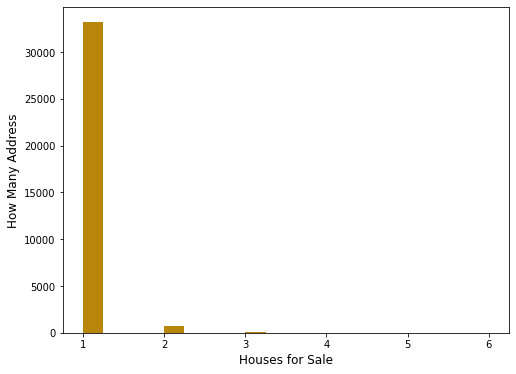

In [24]:
plt.figure(figsize=(8, 6))

df.Address.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod')

plt.xlabel('Houses for Sale', fontsize=12)
plt.ylabel('How Many Address', fontsize=12);

## 2.3 Rooms

### 2.31 Value Counts

In [25]:
df.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

### 2.32 Correlation with Price

#### Heatmap

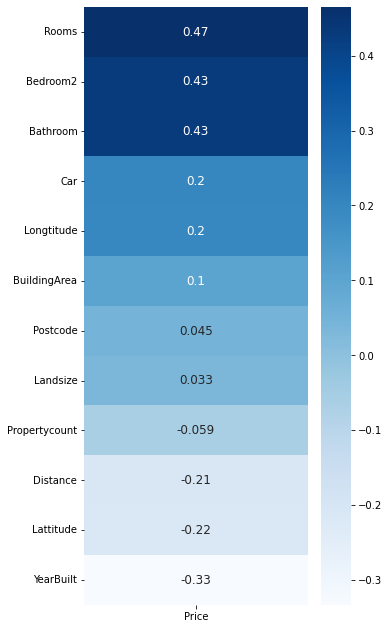

In [26]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Scatter

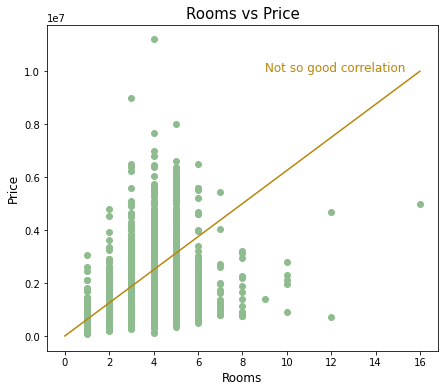

In [27]:
plt.figure(figsize=(7, 6))
x = np.linspace(0, 16)
y = np.linspace(0, 1e7)
plt.plot(x, y, c='darkgoldenrod')
plt.scatter(df['Rooms'], df['Price'], color='darkseagreen')
plt.title('Rooms vs Price', fontsize=15)
plt.xlabel('Rooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.text(9, 1e7, 'Not so good correlation', fontsize=12, color='darkgoldenrod');

### 2.33 Plot Distribution

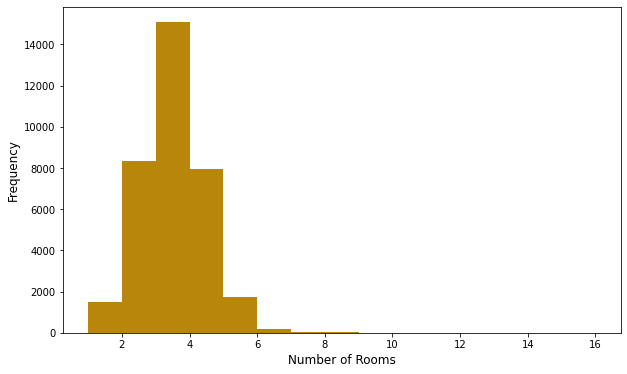

In [28]:
df['Rooms'].plot(kind='hist', bins=15, figsize=(10, 6), color='darkgoldenrod')
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

## 2.4 Type

### 2.41 Value Counts

In [29]:
df['Type'].value_counts()

h    23980
u     7297
t     3580
Name: Type, dtype: int64

### 2.42 Correlation with Price

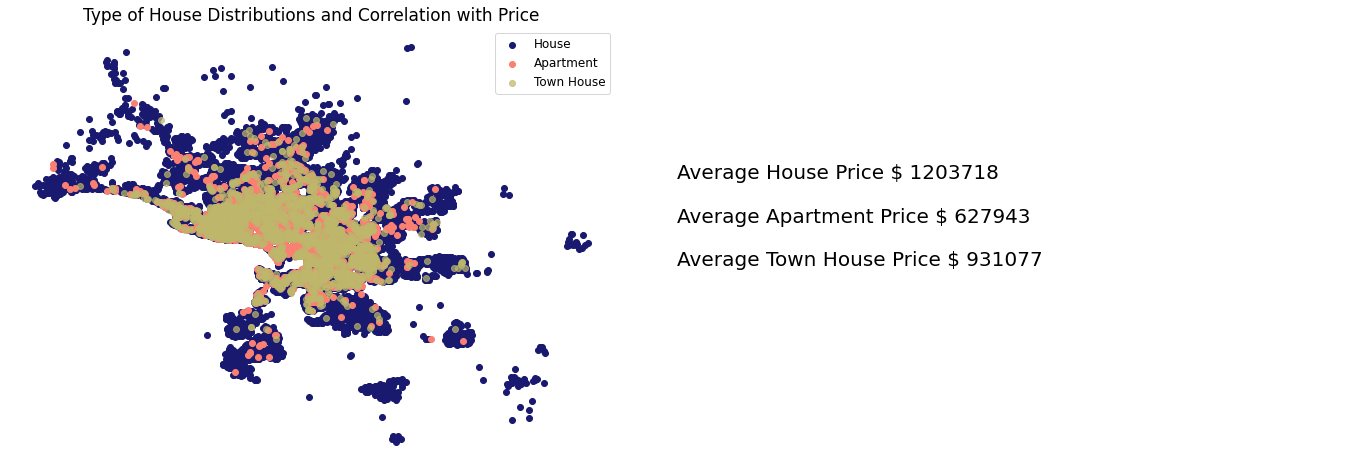

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 8), gridspec_kw={'width_ratios':[1, 1]})

ax1.scatter(df.Lattitude[df['Type']=='h'], df.Longtitude[df['Type']=='h'], c='midnightblue', label='House')
ax1.scatter(df.Lattitude[df['Type']=='u'], df.Longtitude[df['Type']=='u'], c='salmon', label='Apartment')
ax1.scatter(df.Lattitude[df['Type']=='t'], df.Longtitude[df['Type']=='t'], c='darkkhaki', label='Town House', alpha=0.7)
ax1.legend(fontsize=12)
ax1.set_title('Type of House Distributions and Correlation with Price', fontsize=17)
ax1.axis('off');

avg_price_house = df.Price[df['Type']=='h'].mean()
avg_price_apartment = df.Price[df['Type']=='u'].mean()
avg_price_townhouse = df.Price[df['Type']=='t'].mean()

ax2.text(-0.1, 0.65, f'Average House Price $ {avg_price_house:.0f}', fontsize=20)
ax2.text(-0.1, 0.55, f'Average Apartment Price $ {avg_price_apartment:.0f}', fontsize=20)
ax2.text(-0.1, 0.45, f'Average Town House Price $ {avg_price_townhouse:.0f}', fontsize=20)
ax2.axis('off');

### 2.43 Plot Distribution

#### Horizontal Bar

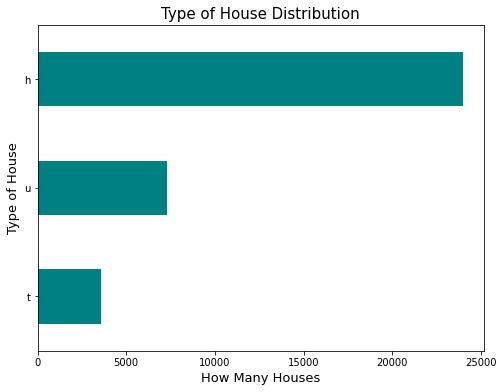

In [31]:
df['Type'].value_counts()[::-1].plot(kind='barh', color='teal', figsize=(8,6));
plt.title('Type of House Distribution', fontsize=15)
plt.xlabel('How Many Houses', fontsize=13)
plt.ylabel('Type of House', fontsize=13);

## 2.5 Price

In [32]:
df.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### 2.51 Value Counts

In [33]:
df.Price.value_counts()

1100000.00    235
600000.00     235
650000.00     219
800000.00     217
1300000.00    210
             ... 
1452000.00      1
2555000.00      1
949500.00       1
426500.00       1
1605500.00      1
Name: Price, Length: 2871, dtype: int64

#### Mean

In [34]:
df.Price.mean()

1050173.344955408

#### Max

In [35]:
df.Price.max()

11200000.0

#### Min

In [36]:
df.Price.min()

85000.0

### 2.52 Plot Distribution

#### Box Plot

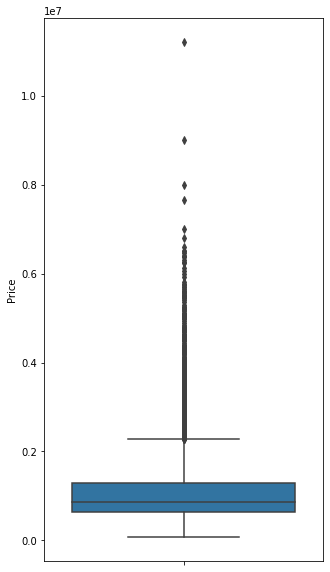

In [37]:
# Skala harga dalam grafik adalah 10 juta dolar

plt.figure(figsize=(5, 10))
sns.boxplot(y = df['Price']);

#### **Max = Q3 + 1.5 (Q3 - Q1)**

#### **Min = Q1 - 1.5 (Q3 - Q1)**

In [38]:
q1 = np.percentile(df.Price.to_numpy(na_value=0), q=25)
q3 = np.percentile(df.Price.to_numpy(na_value=0), q=75)

print(f'Max : {q3 + 1.5*(q3-q1)}, Min: {q1 - 1.5*(q3-q1)}')

Max : 2275000.0, Min: -725000.0


#### Karena harga pasti positif, maka nilai minimumnya kita set menjadi $0

### 2.53 Remove Outliers

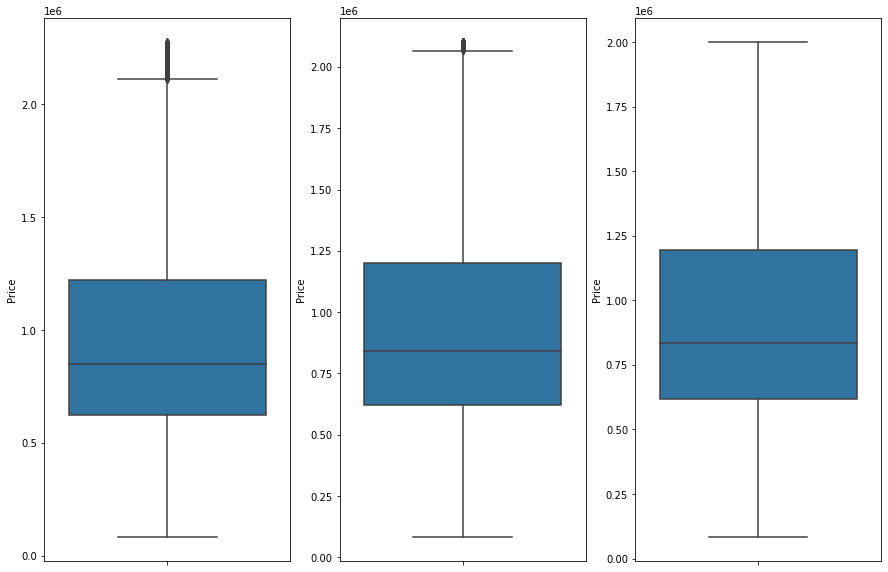

In [39]:
# Skala harga dalam grafik adalah 10 juta dolar

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

sns.boxplot(y = df.Price[df['Price']<=2275000], ax=ax1);
sns.boxplot(y = df.Price[df['Price']<=2100000], ax=ax2);
sns.boxplot(y = df.Price[df['Price']<=2000000], ax=ax3);

### 2.54 Why Remove Outlier First? Why Not Just Input Values?

In [40]:
hundred = np.ones(shape=(1000))*100
hundred[:10]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [41]:
hundred = np.append(hundred, values=(1000000)) # the 1000.000 is an outlier

In [42]:
hundred.mean() # nilai 

1098.901098901099

### 2.55 Input Missing Values

#### Buat dataframe baru yang tidak mengikutsertakan outlier

In [43]:
df_new = df[df['Price']<=2000000]

In [44]:
df_new.Price.isnull().sum(axis=0)

0

In [45]:
len(df_new)

25381

#### Karena kita lihat bahwa sortiran kita (<2000.000) tidak mengikutsertakan null values maka kita akan buat data frame khusus ketika harganya berupa null values

In [46]:
df_price_null = df[df.Price.isnull()]

#### Nilai yang kita buang (outlier) ada 1866

In [47]:
len(df) - (len(df_new) + len(df_price_null))

1866

#### Buat dataframe final

In [48]:
df2 = df_new.append(df_price_null)

In [49]:
df2.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7947
Bathroom          7954
Car               8435
Landsize         11350
BuildingArea     20126
YearBuilt        18411
CouncilArea          3
Lattitude         7718
Longtitude        7718
Regionname           3
Propertycount        3
dtype: int64

#### Karena sudah tidak ada outlier maka kita bisa ganti nilai kosong dengan mean (rata-rata)

In [50]:
df2.Price.mean()

924207.0782869075

#### Fillna method

In [51]:
df2.Price = df2.Price.fillna(df2.Price.mean())

In [52]:
df2.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7947
Bathroom          7954
Car               8435
Landsize         11350
BuildingArea     20126
YearBuilt        18411
CouncilArea          3
Lattitude         7718
Longtitude        7718
Regionname           3
Propertycount        3
dtype: int64

### 2.56 Plot New Distribution

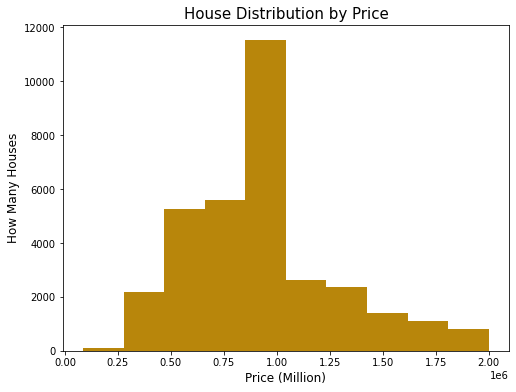

In [53]:
df2.Price.plot(kind='hist', figsize=(8,6), color='darkgoldenrod')
plt.title('House Distribution by Price', fontsize=15)
plt.xlabel('Price (Million)', fontsize=12)
plt.ylabel('How Many Houses', fontsize=12);

## 2.6 Method

In [54]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


### 2.61 Value Counts

In [55]:
df2.Method.value_counts()

S     18623
SP     4989
PI     4540
VB     2789
SN     1317
PN      308
SA      216
W       173
SS       36
Name: Method, dtype: int64

`Method`:
* S - property sold
* SP - property sold prior
* PI - property passed in
* PN - sold prior not disclosed
* SN - sold not disclosed
* VB - vendor bid
* W - withdrawn prior to auction
* SA - sold after auction
* SS - sold after auction price not disclosed

In [56]:
df2.Method.isnull().sum(axis=0)

0

### 2.62 Plot Distribution and Correlation with Price

In [57]:
avg_price_s = df2.Price[df.Method == 'S'].mean()
avg_price_sp = df2.Price[df.Method == 'SP'].mean()
avg_price_pi = df2.Price[df.Method == 'PI'].mean()
avg_price_vb = df2.Price[df.Method == 'VB'].mean()
avg_price_sn = df2.Price[df.Method == 'SN'].mean()
avg_price_pn = df2.Price[df.Method == 'PN'].mean()
avg_price_sa = df2.Price[df.Method == 'SA'].mean()
avg_price_w = df2.Price[df.Method == 'W'].mean()
avg_price_ss = df2.Price[df.Method == 'SS'].mean()

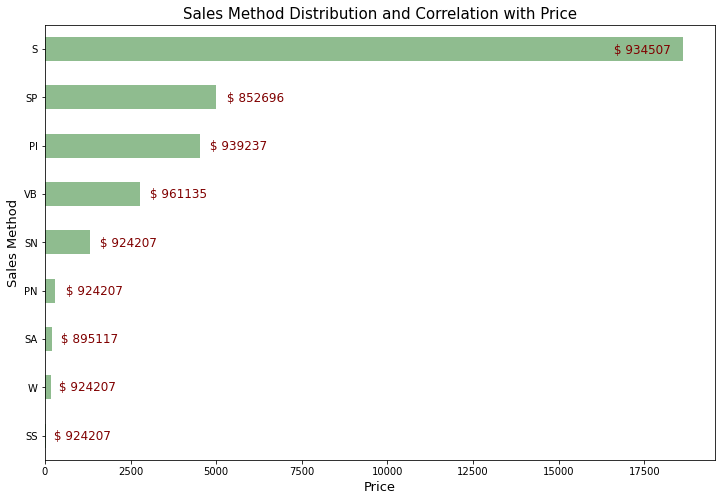

In [58]:
df2.Method.value_counts()[::-1].plot(kind='barh', figsize=(12, 8), color='darkseagreen');
plt.text(16500, 7.9, f' $ {avg_price_s:.0f}', color='maroon', fontsize=12)
plt.text(5200, 6.92, f' $ {avg_price_sp:.0f}', color='maroon', fontsize=12)
plt.text(4700, 5.92, f' $ {avg_price_pi:.0f}', color='maroon', fontsize=12)
plt.text(2950, 4.92, f' $ {avg_price_vb:.0f}', color='maroon', fontsize=12)
plt.text(1500, 3.92, f' $ {avg_price_sn:.0f}', color='maroon', fontsize=12)
plt.text(500, 2.92, f' $ {avg_price_pn:.0f}', color='maroon', fontsize=12)
plt.text(350, 1.92, f' $ {avg_price_sa:.0f}', color='maroon', fontsize=12)
plt.text(300, 0.92, f' $ {avg_price_w:.0f}', color='maroon', fontsize=12)
plt.text(150, -0.08, f' $ {avg_price_ss:.0f}', color='maroon', fontsize=12)
plt.title('Sales Method Distribution and Correlation with Price', fontsize=15)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Sales Method', fontsize=13);

## 2.7 Seller G

### 2.71 Value Counts

In [59]:
df2.SellerG.value_counts()

Barry            3216
Nelson           3138
Jellis           2991
hockingstuart    2547
Ray              1930
                 ... 
AIME                1
Black               1
Vic                 1
Joe                 1
Methven             1
Name: SellerG, Length: 382, dtype: int64

### 2.72 Correlation with Price

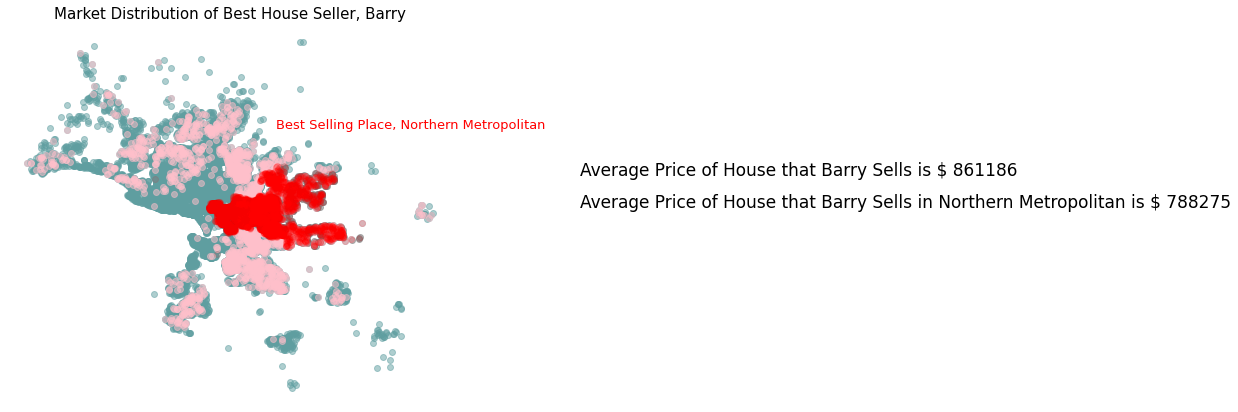

In [60]:
plt.figure(figsize=(8, 7))
plt.scatter(df2.Lattitude, df2.Longtitude, color='cadetblue', alpha=0.5)
plt.scatter(df2.Lattitude[df2.SellerG == 'Barry'], df2.Longtitude[df2.SellerG == 'Barry'], color='pink', alpha=0.5)
plt.scatter(df2.Lattitude[df2.Regionname == 'Northern Metropolitan'], df2.Longtitude[df2.Regionname == 'Northern Metropolitan'], color='red', alpha=0.1)
barry_avg_price = df2.Price[df.SellerG == 'Barry'].mean()
barry_northern_avg_price = df2.Price[(df.SellerG == 'Barry') & (df2.Regionname == 'Northern Metropolitan')].mean()
plt.text(-37.1, 145.1,  f'Average Price of House that Barry Sells is $ {barry_avg_price:.0f}', fontsize=17);
plt.text(-37.1, 145,  f'Average Price of House that Barry Sells in Northern Metropolitan is $ {barry_northern_avg_price:.0f}', fontsize=17);
plt.text(-37.7, 145.25,  f'Best Selling Place, Northern Metropolitan', fontsize=13, color='red');
plt.axis('off')
plt.title('Market Distribution of Best House Seller, Barry', fontsize=15);

### 2.73 Plot Distribution

#### Histogram

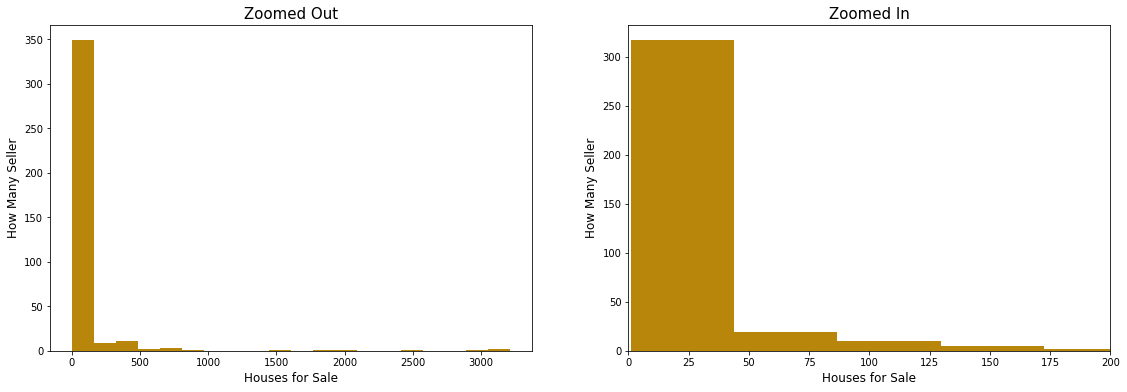

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

df2.SellerG.value_counts().plot(kind='hist', bins=20, color='darkgoldenrod', ax=ax1);
ax1.set_title('Zoomed Out', fontsize=15)
ax1.set_xlabel('Houses for Sale', fontsize=12);
ax1.set_ylabel('How Many Seller', fontsize=12);

df2.SellerG.value_counts().plot(kind='hist', bins=75, color='darkgoldenrod', ax=ax2)
ax2.set_xlim(0, 200)
ax2.set_title('Zoomed In', fontsize=15)
ax2.set_xlabel('Houses for Sale', fontsize=12)
ax2.set_ylabel('How Many Seller', fontsize=12);

#### Horizontal Bar

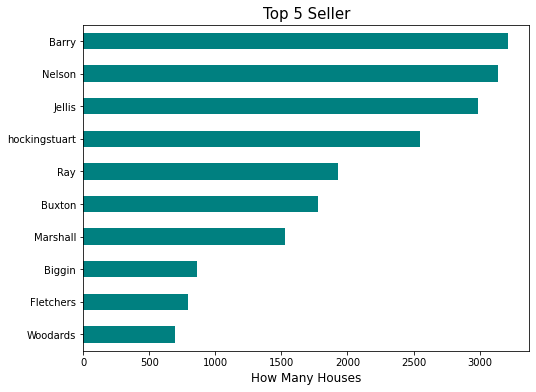

In [62]:
plt.figure(figsize=(8, 6))
df2.SellerG.value_counts()[:10][::-1].plot(kind='barh', color='teal')
plt.title('Top 5 Seller', fontsize=15)
plt.xlabel('How Many Houses', fontsize=12);

## 2.8 Date

### 2.81 Change to DateTime Format

In [63]:
df2.Date.iloc[0] # String Format

'3/12/2016'

In [64]:
df2.Date = pd.to_datetime(df2.Date)

In [65]:
df2.Date.iloc[0] # Date Time Format

Timestamp('2016-03-12 00:00:00')

### 2.82 Extract Year from Date Column

In [66]:
df2['Year'] = df2.Date.dt.year

In [67]:
df2[:2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,...,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,...,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016


### 2.83 Value Counts

In [68]:
df2.Year.value_counts()

2017    18825
2016     9673
2018     4493
Name: Year, dtype: int64

### 2.84 Correlation with Price

#### Line Plot

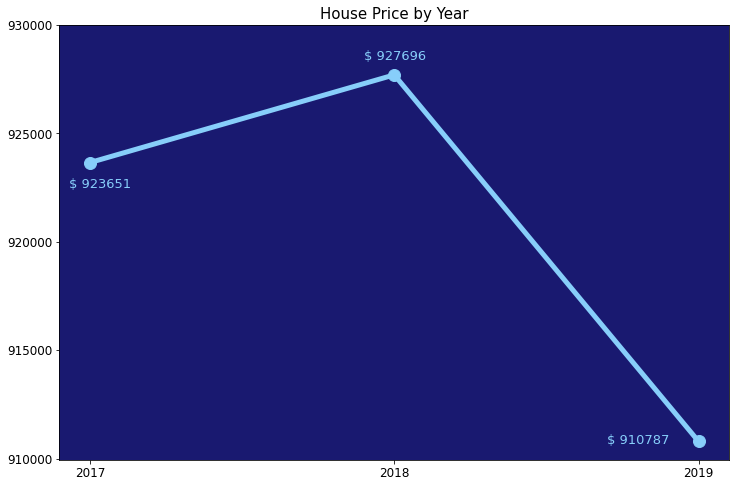

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))

avg_price_2016 = df2.Price[df2.Year == 2016].mean()
avg_price_2017 = df2.Price[df2.Year == 2017].mean()
avg_price_2018 = df2.Price[df2.Year == 2018].mean()

ax.plot([2017, 2018, 2019], [avg_price_2016, avg_price_2017, avg_price_2018], '-o', color='lightskyblue', linewidth=5, markersize=12)
ax.set_xticks(np.arange(2017, 2019+1))
ax.set_facecolor('midnightblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('House Price by Year', fontsize=15)
ax.set_yticks(np.arange(910000, 935000, 5000))
ax.text(2016.93, 922500, f'$ {avg_price_2016:.0f}', color='lightskyblue', fontsize=13)
ax.text(2017.9, 928400, f'$ {avg_price_2017:.0f}', color='lightskyblue', fontsize=13)
ax.text(2018.7, 910700, f'$ {avg_price_2018:.0f}', color='lightskyblue', fontsize=13);

### 2.85 Plot Distribution

#### Scatter Plot

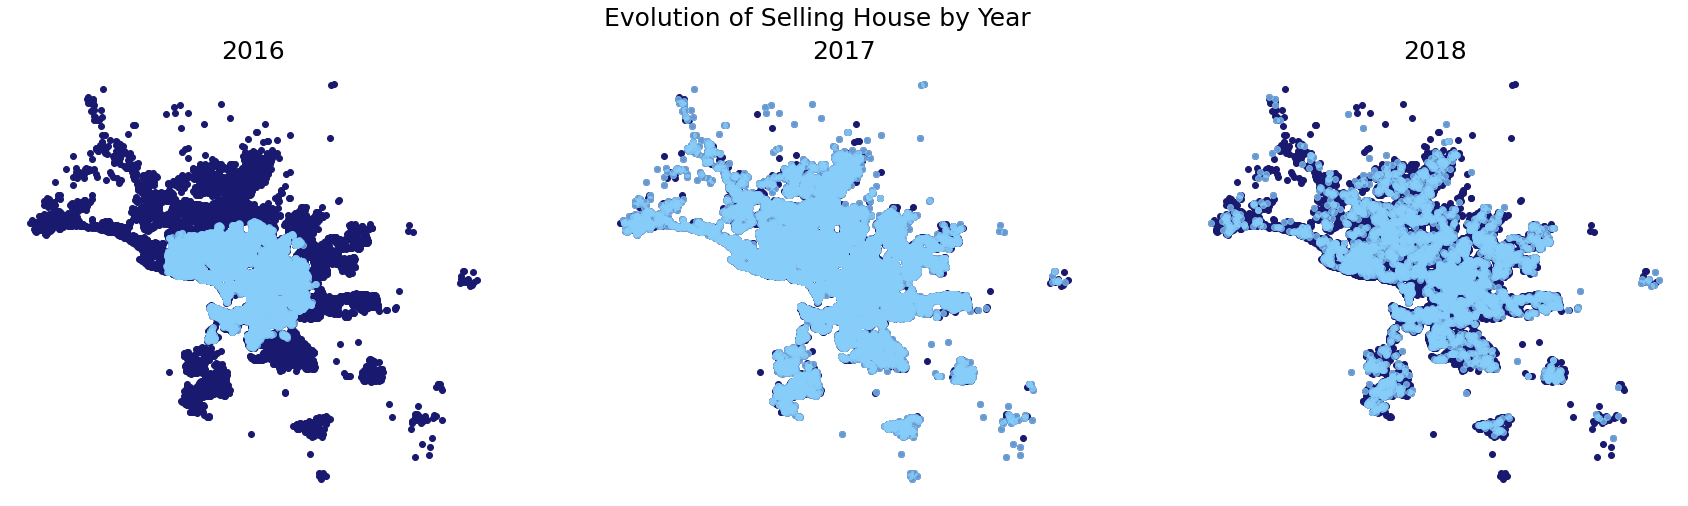

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

ax1.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax1.scatter(df2.Lattitude[df2.Year == 2016], df2.Longtitude[df2.Year == 2016], color='lightskyblue', alpha=0.7)
ax1.set_title('2016', fontsize=25)
ax1.axis('off')

ax2.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax2.scatter(df2.Lattitude[df2.Year == 2017], df2.Longtitude[df2.Year == 2017], color='lightskyblue', alpha=0.7)
ax2.set_title('2017', fontsize=25)
ax2.axis('off')

ax3.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax3.scatter(df2.Lattitude[df2.Year == 2018], df2.Longtitude[df2.Year == 2018], color='lightskyblue', alpha=0.7)
ax3.set_title('2018', fontsize=25)
ax3.axis('off')

plt.suptitle('Evolution of Selling House by Year', fontsize=25);

#### Horizontal Bar

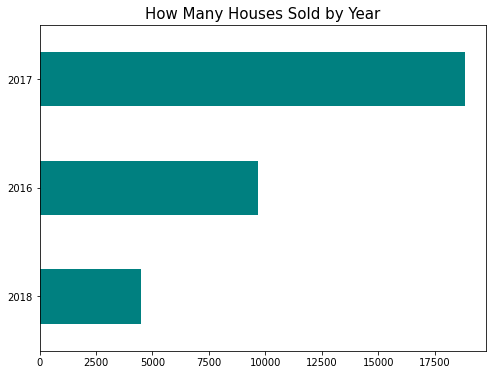

In [71]:
plt.figure(figsize=(8, 6))
df2.Year.value_counts()[::-1].plot(kind='barh', color='teal')
plt.title('How Many Houses Sold by Year', fontsize=15);

## 2.9 Distance

### 2.91 Value Counts

In [72]:
df2.Distance.value_counts()

11.20    1301
13.80     646
10.50     604
9.20      591
7.80      589
         ... 
22.90       1
33.00       1
29.50       1
30.60       1
32.60       1
Name: Distance, Length: 215, dtype: int64

### 2.92 Remove Null Values

In [73]:
df2.Distance.isnull().sum(axis=0)

1

In [74]:
df2 = df2.dropna(subset=['Distance'])

In [75]:
df2.Distance.isnull().sum(axis=0)

0

### 2.93 Extract per 10 KM Distance

In [76]:
df2['10_km'] = df2.Distance.apply(lambda x: 1 if 0<=x<=10 else 0)

In [77]:
df2['20_km'] = df2.Distance.apply(lambda x: 1 if 10 < x<=20 else 0)
df2['30_km'] = df2.Distance.apply(lambda x: 1 if 20 < x<=30 else 0)
df2['40_km'] = df2.Distance.apply(lambda x: 1 if 30 < x<=40 else 0)
df2['50_km'] = df2.Distance.apply(lambda x: 1 if 40 < x<=50 else 0)

In [78]:
df2[:2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Year,10_km,20_km,30_km,40_km,50_km
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,...,-37.80,145.00,Northern Metropolitan,4019.00,2016,1,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,...,-37.81,144.99,Northern Metropolitan,4019.00,2016,1,0,0,0,0


### 2.94 Correlation with Price

#### Heatmap

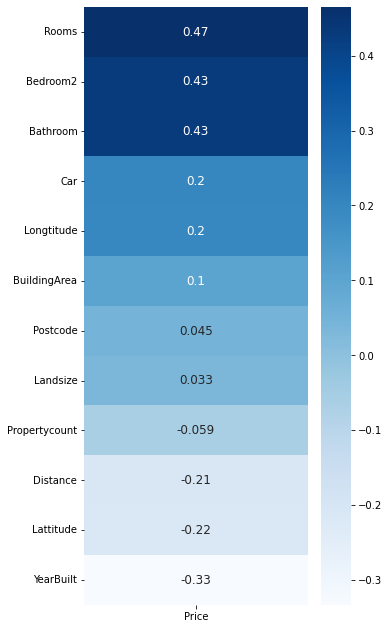

In [79]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Horizontal Bar

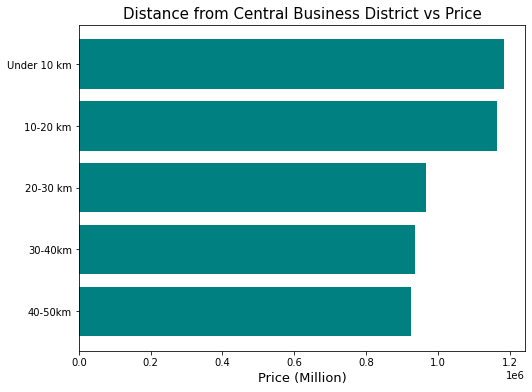

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(['Under 10 km', '10-20 km', '20-30 km', '30-40km', '40-50km'], [df2.Price[df2['10_km']].mean(), df2.Price[df2['20_km']].mean(), df2.Price[df2['30_km']].mean(), df2.Price[df2['40_km']].mean(), df2.Price[df2['50_km']].mean()], color='teal')
ax.invert_yaxis()
ax.set_title('Distance from Central Business District vs Price', fontsize=15)
ax.set_xlabel('Price (Million)', fontsize=13);

### 2.95 Plot Statistics

#### Histogram

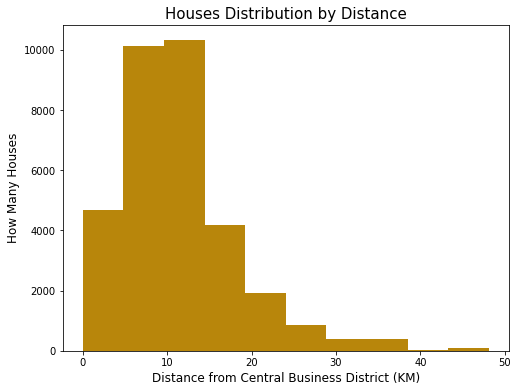

In [81]:
df2.Distance.plot(kind='hist', color='darkgoldenrod', figsize=(8, 6))
plt.xlabel('Distance from Central Business District (KM)', fontsize=12)
plt.ylabel('How Many Houses', fontsize=12)
plt.title('Houses Distribution by Distance', fontsize=15);

## 2.10 Postcode

### 2.101 Value Counts

In [82]:
df2.Postcode.value_counts()

3073.00    844
3046.00    638
3020.00    617
3121.00    594
3165.00    581
          ... 
3770.00      1
3786.00      1
3139.00      1
3788.00      1
3159.00      1
Name: Postcode, Length: 211, dtype: int64

In [83]:
df2.Distance.isnull().sum(axis=0)

0

### 2.102 Correlation with Price

#### Heatmap

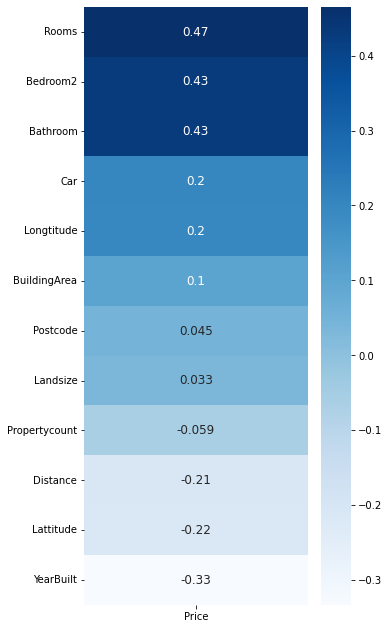

In [84]:
plt.figure(figsize=(5, 11))
sns.heatmap(pd.DataFrame(data={'Price': df.corr().loc['Price']}).sort_values(ascending=False, by='Price')[1:], cmap='Blues', annot=True, annot_kws={'size':12});

#### Scatter Plot (Analysis the Postcode with Q3 of Price (Expensive) and Q1 (Cheap))

In [85]:
np.percentile(df2.Price, q=25)

680000.0

In [86]:
np.percentile(df2.Price, q=75)

1050000.0

In [87]:
df2.Postcode[df2.Price < 680000.0].value_counts().iloc[:3] # Below Q1 (Cheap)

3073.00    359
3020.00    300
3046.00    273
Name: Postcode, dtype: int64

In [88]:
df2.Postcode[df2.Price > 1050000.0].value_counts().iloc[:3] # Upper Q3 (Expensive)

3165.00    299
3204.00    263
3121.00    227
Name: Postcode, dtype: int64

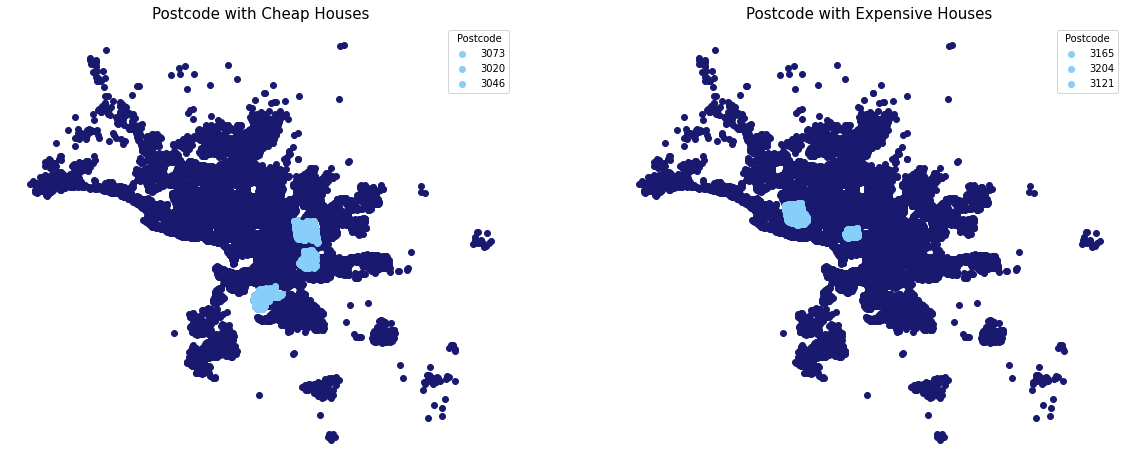

In [89]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax1.scatter(df2.Lattitude[df2.Postcode == 3073], df2.Longtitude[df2.Postcode == 3073], color='lightskyblue', label='3073')
ax1.scatter(df2.Lattitude[df2.Postcode == 3020], df2.Longtitude[df2.Postcode == 3020], color='lightskyblue', label='3020')
ax1.scatter(df2.Lattitude[df2.Postcode == 3046], df2.Longtitude[df2.Postcode == 3046], color='lightskyblue', label='3046')
ax1.legend(title='Postcode')
ax1.axis('off')
ax1.set_title('Postcode with Cheap Houses', fontsize=15)

ax2.scatter(df2.Lattitude, df2.Longtitude, color='midnightblue')
ax2.scatter(df2.Lattitude[df2.Postcode == 3165], df2.Longtitude[df2.Postcode == 3165], color='lightskyblue', label='3165')
ax2.scatter(df2.Lattitude[df2.Postcode == 3204], df2.Longtitude[df2.Postcode == 3204], color='lightskyblue', label='3204')
ax2.scatter(df2.Lattitude[df2.Postcode == 3121], df2.Longtitude[df2.Postcode == 3121], color='lightskyblue', label='3121')
ax2.legend(title='Postcode')
ax2.axis('off')
ax2.set_title('Postcode with Expensive Houses', fontsize=15);